<a href="https://colab.research.google.com/github/nehag312/Credit-Card-Default-Prediction/blob/main/Credit_Card_Continue_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Til now, I've performed EDA on our dataset, removed the columns which I thought is of less importance or irrelevant to us, treated the missing values present in data, encoded the categorical values using appropriate method for each columns and finally dealt with the problem of multicollinearity.

After all these steps, we are left with 50 columns in our dataset,which still is large. So, I'm gonna do feature selection for each of the techniques that I'm gonna use like Decision Tree, Random Forest, KNN Classifer,SVM and Neural Network. 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#displaying all the rows and columns
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Aus project/credit_data_standardised.csv",index_col=0)
df

,TARGET,NAME_EDUCATION_TYPE,FLAG_MOBIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN_None,CNT_CHILDREN_more than 2,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,OCCUPATION_TYPE_Average risk job,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_High Risk Jobs,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Sales staff,WEEKDAY_APPR_PROCESS_START_WEEKENDS,ORGANIZATION_TYPE_Industries,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA,NAME_TYPE_SUITE_Others,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_CA/ML/Unemployed,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Not House / apartment,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,2,2,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0.142129,-0.478095,-0.166142,-0.149452,1.506880,-0.456215,0.379837,0.579154,-1.265722,-0.631821,-1.316987,-2.059587,0.241251,4.162039,5.251711,-0.206990,-0.305022,-0.505582
1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0.426792,1.725450,0.592676,-1.252750,-0.166821,-0.460115,1.078697,1.790855,-0.167639,-0.325620,0.565079,0.653873,-0.175814,-0.321336,-0.276354,0.163109,-0.305022,-1.070754
2,0,0,1,2,2,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,-0.427196,-1.152888,-1.404655,-0.783451,-0.689509,-0.453299,0.206116,0.306869,-1.265722,-0.938022,0.217611,1.214537,-0.592878,-0.321336,-0.276354,0.178832,-0.305022,-1.070754
3,0,0,1,2,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.142533,-0.711430,0.177872,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,-0.167639,1.511587,0.712775,1.259080,0.241251,-0.321336,-0.276354,0.418308,-0.305022,-0.053445
4,0,0,1,2,2,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,-0.199466,-0.213734,-0.361746,0.563570,-0.892535,-0.473210,0.191639,-0.307263,-1.265722,-0.325620,-1.003797,0.041372,-0.592878,-0.321336,-0.276354,-0.173125,-0.305022,-1.070754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,-0.047646,-0.855489,0.031014,0.845396,1.537586,-0.453377,-0.984955,0.670578,-1.265722,0.899185,0.876157,0.006151,-0.592878,-0.321336,-0.276354,0.834367,-0.073422,-0.392548
307507,0,0,1,2,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,-0.408219,-0.818594,-1.042322,0.310593,-1.085707,2.133617,0.169782,-0.725959,-1.265722,-1.244224,-2.086773,0.279623,-0.592878,-0.321336,-0.276354,1.164553,-0.305022,-0.053445
307508,0,1,1,3,3,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,-0.066623,0.195379,0.198053,-1.147120,0.245417,-0.507774,-0.497002,-1.428203,-1.265722,-0.938022,0.111850,-1.618648,1.909510,-0.321336,-0.276354,-1.144332,0.852975,-0.505582
307509,1,0,1,2,2,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0.009287,-0.568757,-0.476314,-1.124635,0.934008,-0.485583,0.688107,1.366859,-0.167639,-0.938022,-0.001079,0.834289,-0.592878,-0.321336,-0.276354,0.775103,-0.305022,-1.070754


In [ ]:
miss = df.isnull().sum().sort_values(ascending = False)
miss

TARGET                                     0
REGION_POPULATION_RELATIVE                 0
NAME_TYPE_SUITE_Others                     0
NAME_TYPE_SUITE_Unaccompanied              0
NAME_INCOME_TYPE_CA/ML/Unemployed          0
NAME_INCOME_TYPE_State servant             0
NAME_INCOME_TYPE_Working                   0
NAME_FAMILY_STATUS_Married                 0
NAME_FAMILY_STATUS_Single                  0
NAME_FAMILY_STATUS_Widow                   0
NAME_HOUSING_TYPE_Not House / apartment    0
AMT_INCOME_TOTAL                           0
AMT_CREDIT                                 0
AMT_ANNUITY                                0
DAYS_BIRTH                                 0
NAME_EDUCATION_TYPE                        0
DAYS_EMPLOYED                              0
DAYS_REGISTRATION                          0
DAYS_ID_PUBLISH                            0
CNT_FAM_MEMBERS                            0
HOUR_APPR_PROCESS_START                    0
EXT_SOURCE_2                               0
EXT_SOURCE

# **Feature importance**

In [ ]:
#splitting dataset into X(explanatory) and Y(target variable)
X = df.drop(["TARGET"],axis=1)
y = df['TARGET']

In [ ]:
# split X and y into training and testing sets (SMOTE)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((246008, 57), (61503, 57))

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([4.95821416e-03, 5.15214949e-02, 3.04927669e-02, 3.16716918e-02,
       9.99099008e-04, 3.78005075e-05, 1.31737492e-04, 1.65786926e-03,
       4.11848644e-03, 2.22561607e-03, 2.65305587e-02, 1.75437828e-04,
       1.06694527e-03, 6.87062586e-03, 6.15069803e-04, 5.69645724e-03,
       2.45865433e-02, 6.21565545e-04, 7.02325856e-04, 6.38510160e-03,
       5.46555423e-03, 0.00000000e+00, 5.01681000e-04, 1.52870752e-03,
       4.56524280e-04, 1.81189614e-03, 2.33831730e-03, 2.31500886e-04,
       0.00000000e+00, 3.39639474e-03, 6.24085602e-04, 3.47905862e-02,
       2.73878223e-03, 3.27735933e-04, 1.33624451e-02, 2.13544799e-02,
       2.78353306e-03, 0.00000000e+00, 8.25378210e-04, 6.37132820e-04,
       6.49165605e-03, 1.25062381e-02, 3.36227363e-03, 3.81293223e-03,
       8.78387240e-03, 1.76965464e-03, 1.60618204e-03, 7.78696236e-03,
       3.33787105e-03, 1.20071379e-02, 1.28074924e-02, 1.04674690e-02,
       1.39312159e-02, 1.57857304e-02, 3.42242366e-03, 1.02737617e-02,
      

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

FLAG_MOBIL                                 0.051521
NAME_TYPE_SUITE_Unaccompanied              0.034791
REGION_RATING_CLIENT_W_CITY                0.031672
REGION_RATING_CLIENT                       0.030493
CNT_CHILDREN_None                          0.026531
FLAG_OWN_REALTY_Y                          0.024587
NAME_FAMILY_STATUS_Married                 0.021354
DEF_60_CNT_SOCIAL_CIRCLE                   0.015786
DEF_30_CNT_SOCIAL_CIRCLE                   0.013931
NAME_INCOME_TYPE_Working                   0.013362
EXT_SOURCE_3                               0.012807
AMT_ANNUITY                                0.012506
EXT_SOURCE_2                               0.012007
OBS_30_CNT_SOCIAL_CIRCLE                   0.010467
AMT_REQ_CREDIT_BUREAU_MON                  0.010274
DAYS_EMPLOYED                              0.008784
AMT_REQ_CREDIT_BUREAU_YEAR                 0.007865
CNT_FAM_MEMBERS                            0.007787
CODE_GENDER_M                              0.006871
AMT_CREDIT  

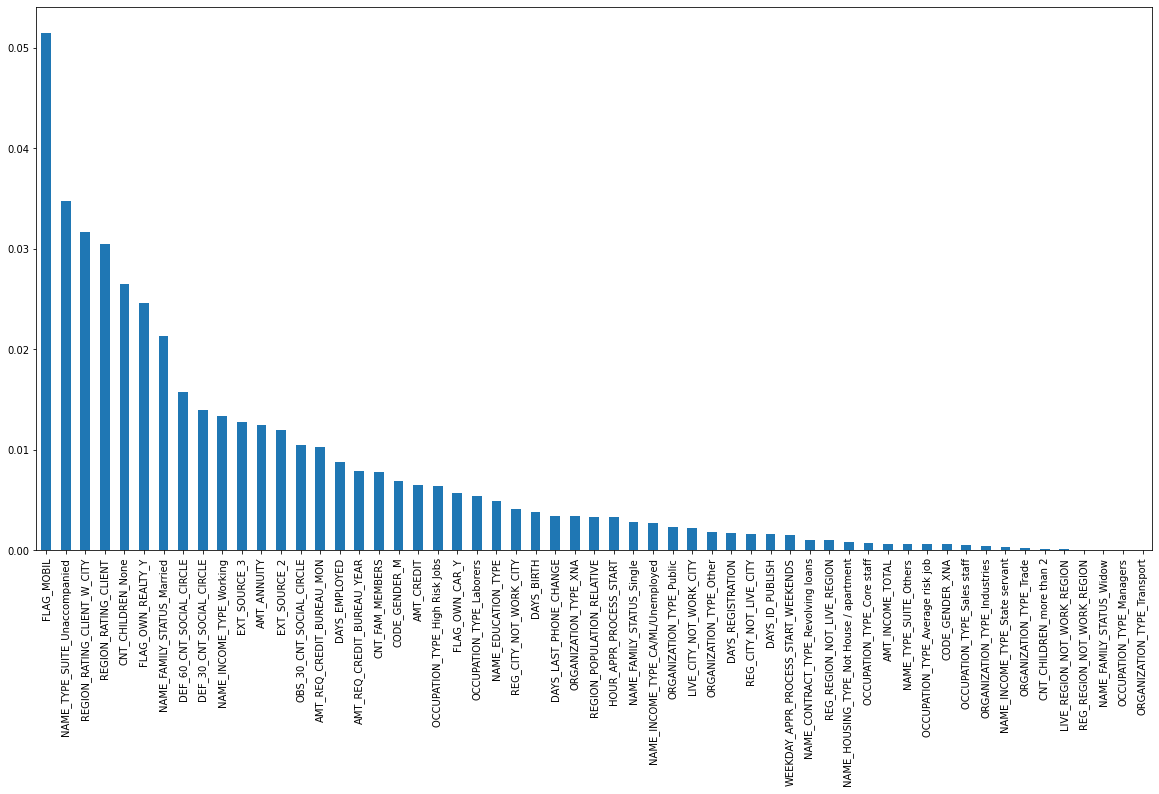

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sel_col=SelectKBest(mutual_info_classif,k=16)
sel_col.fit(X_train,y_train)
best_col=X_train.columns[sel_col.get_support()]
best_col

Index(['FLAG_MOBIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'CNT_CHILDREN_None', 'FLAG_OWN_REALTY_Y',
       'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Married', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_MON'],
      dtype='object')

In [ ]:
X_final=X[best_col]
X_final

,FLAG_MOBIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN_None,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,AMT_ANNUITY,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON
0,1,2,2,1,1,1,1,0,-0.166142,-0.456215,-1.316987,-2.059587,0.241251,4.162039,5.251711,-0.305022
1,1,1,1,1,0,0,0,1,0.592676,-0.460115,0.565079,0.653873,-0.175814,-0.321336,-0.276354,-0.305022
2,1,2,2,1,1,1,1,0,-1.404655,-0.453299,0.217611,1.214537,-0.592878,-0.321336,-0.276354,-0.305022
3,1,2,2,1,1,1,1,0,0.177872,-0.473217,0.712775,1.259080,0.241251,-0.321336,-0.276354,-0.305022
4,1,2,2,1,1,1,1,0,-0.361746,-0.473210,-1.003797,0.041372,-0.592878,-0.321336,-0.276354,-0.305022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,1,1,1,0,1,1,0,0.031014,-0.453377,0.876157,0.006151,-0.592878,-0.321336,-0.276354,-0.073422
307507,1,2,2,1,1,1,0,0,-1.042322,2.133617,-2.086773,0.279623,-0.592878,-0.321336,-0.276354,-0.305022
307508,1,3,3,1,1,1,1,0,0.198053,-0.507774,0.111850,-1.618648,1.909510,-0.321336,-0.276354,0.852975
307509,1,2,2,1,1,1,0,1,-0.476314,-0.485583,-0.001079,0.834289,-0.592878,-0.321336,-0.276354,-0.305022


In [ ]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 6)

# **Decision Tree Classifier**

Decision Tree Classifer doesn't work well if a data is unbalanced. So, I'll use SMOTE() in data having only numerical columns and RandomSample() in data containing categorical values also.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix,roc_curve,f1_score,auc,recall_score,roc_auc_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [ ]:
# split X and y into training and testing sets (SMOTE)
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 0,stratify=y)
X_train.shape, X_test.shape

((246008, 16), (61503, 16))

In [ ]:
print(Counter(y_train))

Counter({0: 226148, 1: 19860})


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size = 0.2, random_state = 0,stratify=y)
X_train.shape, X_val.shape

((246008, 16), (61503, 16))

## **Decison Tree Tuning**

Tuning Weights and Depth of the tree

In [ ]:
# ##with weights
# def model_parameters(X,y,X_val,y_val):
#   max_depths = np.linspace(1, 39, 20, endpoint=True)
#   class_weight = np.linspace(1, 10, 10, endpoint=True)
#   Fscore=[]
#   auc=[]
#   for weight in class_weight:
#       for max_depth in max_depths:  
#         clf_model=DecisionTreeClassifier(criterion="entropy",max_depth=max_depth,class_weight={0:1,1:weight})
#         clf_model.fit(X,y)
#         y_predict=clf_model.predict(X_val)  
#         Fscore.append(f1_score(y_val,y_predict))
#         ypred_prob=clf_model.predict_proba(X_val)[::,1]
#         auc.append(metrics.roc_auc_score(y_val,ypred_prob))


#   # np.array(Fscore).reshape(10,10)
#   print("F1 Score: ",max(Fscore))
#   print("AUC: ",max(auc))

#   return Fscore

# Fscore=model_parameters(X_train,y_train,X_val,y_val)

In [ ]:
# Fscore=np.reshape(Fscore,(10,20))
# Fscore

NameError: ignored

In [ ]:
max_depths = np.linspace(1, 39, 20, endpoint=True)
class_weight = np.linspace(1, 10, 10, endpoint=True)

In [ ]:
# np.where(Fscore==Fscore.max())

In [ ]:
m_depth,c_weight=[max_depths[3],class_weight[5]] 

Take max_depth=7 and class_weight=6

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=m_depth,class_weight={0:1,1:c_weight})
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)


In [ ]:
summary=pd.DataFrame(columns=["Model type","Train Acc","Test Acc","Senstivity","f1 score"])

In [ ]:
#Accuracy check on training and testing dataset
def model_diag(train_pred,y_pred,model_name):
  print("Model accuracy score for Decision Tree Classifier: \nTrain set Accuracy: ", accuracy_score(y_train,train_pred))
  print("Test set Accuracy: ", accuracy_score(y_test,y_pred))
  print("Senstivity: ",recall_score(y_test,y_pred))
  print("F1 score : ",f1_score(y_test,y_pred))
  global summary
  summary=summary.append({"Model type":str(model_name),"Train Acc":accuracy_score(y_train,train_pred),"Test Acc":accuracy_score(y_test,y_pred),"Senstivity":recall_score(y_test,y_pred),"f1 score":f1_score(y_test,y_pred)},ignore_index=True)
  return summary

In [ ]:
summary=model_diag(train_pred,y_pred,"Decision tree without SMOTE")
summary

Model accuracy score for Decision Tree Classifier: 
Train set Accuracy:  0.8418953855159181
Test set Accuracy:  0.8425930442417443
Senstivity:  0.36032225579053373
F1 score :  0.26985443849460744


,Model type,Train Acc,Test Acc,Senstivity,f1 score
0,Decision tree without SMOTE,0.841895,0.842593,0.360322,0.269854


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


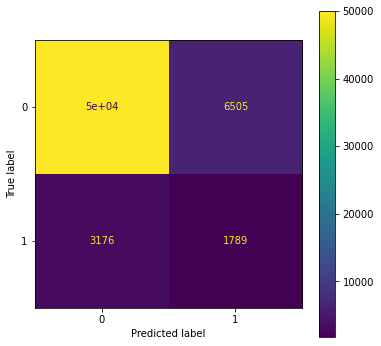

In [ ]:
plot_confusion_matrix(dt,X_test,y_test)

Text(0.5, 0, 'False Positive Rate')

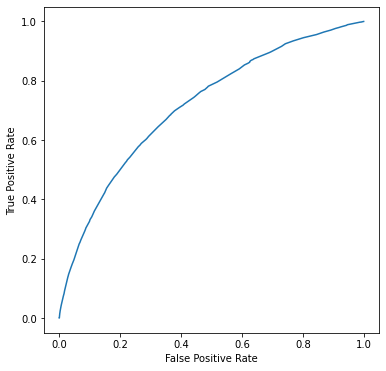

In [ ]:
#ROC curve
ypred_prob=dt.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test,ypred_prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
print("auc score: ",roc_auc_score(y_test,ypred_prob))

auc score:  0.7162377311170054


## **SMOTE**

In [ ]:
#splitting dataset into X(explanatory) and Y(target variable)
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_smote)

Counter({0: 226148, 1: 226148})

In [ ]:
clf_model_smote=DecisionTreeClassifier(max_depth=7)

In [ ]:
clf_model_smote.fit(X_train_smote,y_train_smote)
y_predict_train_smote=clf_model_smote.predict(X_train)
y_predict_smote=clf_model_smote.predict(X_test)

In [ ]:
#Accuracy check on training and testing dataset
model_diag(y_predict_train_smote,y_predict_smote,"Decision tree with SMOTE")

Model accuracy score for Decision Tree Classifier: 
Train set Accuracy:  0.6688075184546844
Test set Accuracy:  0.6694632782140708
Senstivity:  0.6205438066465256
F1 score :  0.23260730059265408


,Model type,Train Acc,Test Acc,Senstivity,f1 score
0,Decision tree without SMOTE,0.841895,0.842593,0.360322,0.269854
1,Decision tree with SMOTE,0.668808,0.669463,0.620544,0.232607


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


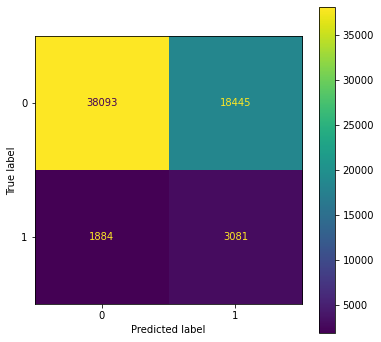

In [ ]:
plot_confusion_matrix(clf_model_smote,X_test,y_test)

Text(0.5, 0, 'False Positive Rate')

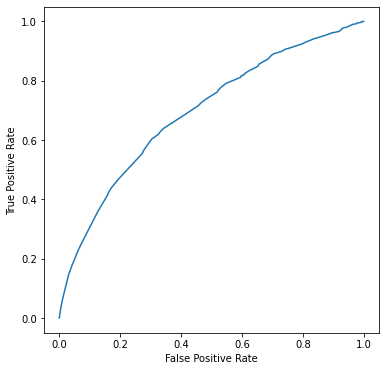

In [ ]:
#ROC curve
ypred_prob_smote=clf_model_smote.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,ypred_prob_smote)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
print("auc score: ",metrics.roc_auc_score(y_test,ypred_prob_smote))

auc score:  0.6941984656328425


## **Random Over Sampling**

In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_over)

Counter({0: 226148, 1: 226148})

In [ ]:
clf_model_over=DecisionTreeClassifier(max_depth=7)

In [ ]:
clf_model_over.fit(X_train_over,y_train_over)
y_predict_train_over=clf_model_over.predict(X_train)
y_predict_over=clf_model_over.predict(X_test)
ypred_prob_over=clf_model_over.predict_proba(X_test)[::,1]

In [ ]:
model_diag(y_predict_train_over,y_predict_over,"Decision tree with Random Over Sampling")

Model accuracy score for Decision Tree Classifier: 
Train set Accuracy:  0.6525804038893044
Test set Accuracy:  0.6545859551566591
Senstivity:  0.6638469284994964
F1 score :  0.23681563443023423


,Model type,Train Acc,Test Acc,Senstivity,f1 score
0,Decision tree without SMOTE,0.841895,0.842593,0.360322,0.269854
1,Decision tree with SMOTE,0.668808,0.669463,0.620544,0.232607
2,Decision tree with Random Over Sampling,0.652580,0.654586,0.663847,0.236816


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


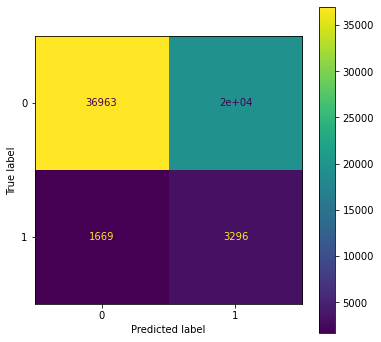

In [ ]:
plot_confusion_matrix(clf_model_over,X_test,y_test)

Text(0.5, 0, 'False Positive Rate')

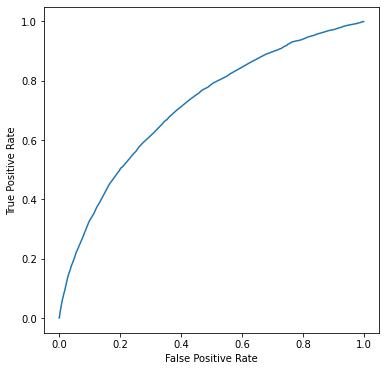

In [ ]:
#ROC curve

fpr,tpr,_=metrics.roc_curve(y_test,ypred_prob_over)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
print("auc score: ",metrics.roc_auc_score(y_test,ypred_prob_over))

auc score:  0.7145584249461823


# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### n_estimator

In [ ]:
# n_ests = np.linspace( 1,201, 41, endpoint=True)
# train_results = []
# val_results = []
# for nest in n_ests:
#    rf = RandomForestClassifier(n_estimators=int(nest),max_depth=7,class_weight={0:1,1:6})
#    rf.fit(X_train, y_train)
#    train_pred = rf.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc_train = auc(false_positive_rate, true_positive_rate)
#    # Add auc score to previous train results
#    train_results.append(roc_auc_train)
#    y_pred = rf.predict(X_val)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
#    roc_auc_val = auc(false_positive_rate, true_positive_rate)
#    # Add auc score to previous test results
#    val_results.append(roc_auc_val)


In [ ]:
# plt.figure(figsize=(15,10))
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(n_ests, train_results, 'b', label="Train AUC")
# line2, = plt.plot(n_ests, val_results, 'r', label="Val AUC")
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel("AUC score")
# plt.xlabel("No of estimators")
# plt.show()

since, increasing the no. of estimator, decreases the AUC score. This implies here decision tree would work better than random forest.

In [ ]:
# n_ests[val_results.index(max(val_results))]

In [ ]:
rf_classifier_smote=RandomForestClassifier(n_estimators=36,max_depth=7,class_weight={0:1,1:6})
# fit the model
rf_classifier_smote.fit(X_train,y_train)
ypred_train_smote_rf=rf_classifier_smote.predict(X_train)
ypred_smote_rf=rf_classifier_smote.predict(X_test)

#Accuracy check on training and testing dataset
model_diag(ypred_train_smote_rf,ypred_smote_rf,"Random forest without SMOTE")

Model accuracy score for Decision Tree Classifier: 
Train set Accuracy:  0.8642686416701896
Test set Accuracy:  0.8638277807586622
Senstivity:  0.31782477341389725
F1 score :  0.273696990720666


,Model type,Train Acc,Test Acc,Senstivity,f1 score
0,Decision tree without SMOTE,0.841895,0.842593,0.360322,0.269854
1,Decision tree with SMOTE,0.668808,0.669463,0.620544,0.232607
2,Decision tree with Random Over Sampling,0.652580,0.654586,0.663847,0.236816
3,Random forest without SMOTE,0.864269,0.863828,0.317825,0.273697


### **SMOTE**

In [ ]:
# instantiate the model
rf_classifier_smote=RandomForestClassifier(n_estimators=36,max_depth=7)

# fit the model
rf_classifier_smote.fit(X_train_smote,y_train_smote)
ypred_smote_rf=rf_classifier_smote.predict(X_test)

In [ ]:
ypred_train_smote_rf=rf_classifier_smote.predict(X_train)
#Accuracy check on training and testing dataset
model_diag(ypred_train_smote_rf,ypred_smote_rf,"Random forest with SMOTE")


Model accuracy score for Decision Tree Classifier: 
Train set Accuracy:  0.6921685473643133
Test set Accuracy:  0.6944701884460921
Senstivity:  0.6298086606243706
F1 score :  0.24971052106208824


,Model type,Train Acc,Test Acc,Senstivity,f1 score
0,Decision tree without SMOTE,0.841895,0.842593,0.360322,0.269854
1,Decision tree with SMOTE,0.668808,0.669463,0.620544,0.232607
2,Decision tree with Random Over Sampling,0.652580,0.654586,0.663847,0.236816
3,Random forest without SMOTE,0.864269,0.863828,0.317825,0.273697
4,Random forest with SMOTE,0.692169,0.694470,0.629809,0.249711


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


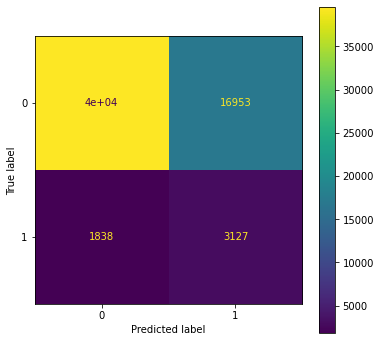

In [ ]:
plot_confusion_matrix(rf_classifier_smote,X_test,y_test)

Text(0.5, 0, 'False Positive Rate')

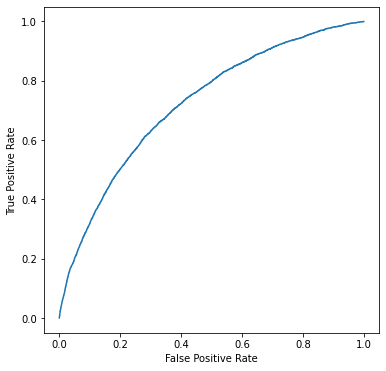

In [ ]:
#ROC curve
ypred_smote_prob=rf_classifier_smote.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,ypred_smote_prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
auc=metrics.roc_auc_score(y_test,ypred_smote_prob)
auc

0.7222031634865118

### **Oversampling**

In [ ]:
# instantiate the model
rf_classifier_over=RandomForestClassifier(n_estimators=36,max_depth=7)

# fit the model
rf_classifier_over.fit(X_train_over,y_train_over)
ypred_over-train_rf=rf_classifier_over.predict(X_train)
ypred_over_rf=rf_classifier_over.predict(X_test)


In [ ]:
#Accuracy check on training and testing dataset
model_diag(ypred_over-train_rf,ypred_over_rf,"Random forest with Random Over Sampling")

NameError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


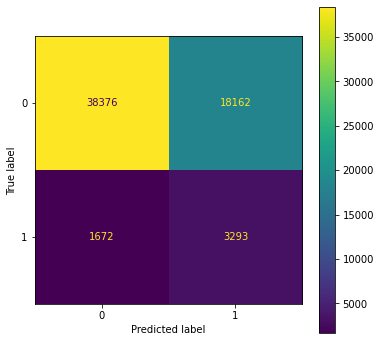

In [ ]:
plot_confusion_matrix(rf_classifier_over,X_test,y_test)

Text(0.5, 0, 'False Positive Rate')

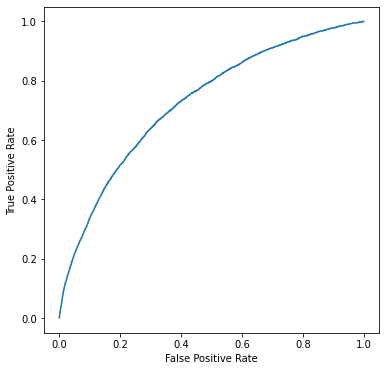

In [ ]:
#ROC curve
ypred_over_prob=rf_classifier_over.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,ypred_over_prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:

auc=metrics.roc_auc_score(y_test,ypred_over_prob)
auc

0.7273230310001557


# **Naive Bayes Classifer**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)
X_train.shape, X_test.shape

((246008, 57), (61503, 57))

In [ ]:
gnb.fit(X_train,y_train)
ypred_train_gnb=gnb.predict(X_train)
ypred_gnb=gnb.predict(X_test)

In [ ]:
model_diag(ypred_train_gnb,ypred_gnb,"Gauss Naive Bayes")

Model accuracy score for Decision Tree Classifier: 
Train set Accuracy:  0.2747837468700205
Test set Accuracy:  0.27744988049363445
Senstivity:  0.9079754601226994
F1 score :  0.17114613447729182


,Model type,Train Acc,Test Acc,Senstivity,f1 score
0,Decision tree without SMOTE,0.841895,0.842593,0.360322,0.269854
1,Decision tree with SMOTE,0.668808,0.669463,0.620544,0.232607
2,Decision tree with Random Over Sampling,0.652580,0.654586,0.663847,0.236816
3,Random forest without SMOTE,0.864269,0.863828,0.317825,0.273697
4,Random forest with SMOTE,0.692169,0.694470,0.629809,0.249711
5,Gauss Naive Bayes,0.274784,0.277450,0.907975,0.171146


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


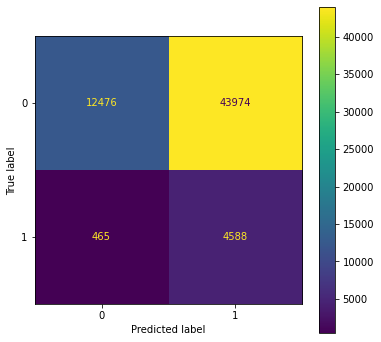

In [ ]:
plot_confusion_matrix(gnb,X_test,y_test)

Text(0.5, 0, 'False Positive Rate')

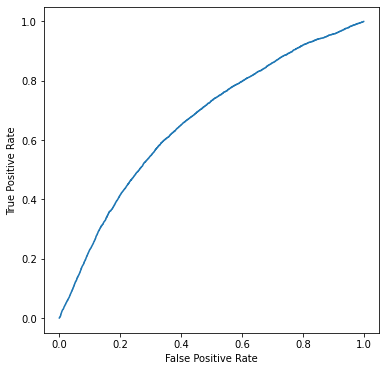

In [ ]:
#ROC curve
ypred_prob=gnb.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,ypred_prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
auc=metrics.roc_auc_score(y_test,ypred_prob)
auc

0.6621781165702019

# **XG Boost**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb=XGBClassifier()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 84,stratify=y)
X_train.shape, X_test.shape


((246008, 16), (61503, 16))

In [ ]:
# define grid
weights = [1, 10, 25, 50,
           75, 100]
param_grid = dict(scale_pos_weight=weights)


In [ ]:
# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=5, random_state=1)
# # define grid search
# grid = GridSearchCV(estimator=xgb, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# # execute the grid search
# grid_result = grid.fit(X, y)

KeyboardInterrupt: ignored

In [ ]:
# # report the best configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # report all configurations
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
model_xgb = XGBClassifier(scale_pos_weight=10)

In [ ]:
model_xgb.fit(X_train,y_train)
train_pred=model_xgb.predict(X_train)
y_pred_xgb=model_xgb.predict(X_test)

In [ ]:
model_diag(train_pred,y_pred_xgb,"XG Boost")

Model accuracy score for Decision Tree Classifier: 
Train set Accuracy:  0.7197896003382004
Test set Accuracy:  0.7192169487667268
Senstivity:  0.608257804632427
F1 score :  0.25912737569179284


,Model type,Train Acc,Test Acc,Senstivity,f1 score
0,Decision tree without SMOTE,0.841895,0.842593,0.360322,0.269854
1,Decision tree with SMOTE,0.668808,0.669463,0.620544,0.232607
2,Decision tree with Random Over Sampling,0.652580,0.654586,0.663847,0.236816
3,Random forest without SMOTE,0.864269,0.863828,0.317825,0.273697
4,Random forest with SMOTE,0.692169,0.694470,0.629809,0.249711
5,Gauss Naive Bayes,0.274784,0.277450,0.907975,0.171146
6,XG Boost,0.719790,0.719217,0.608258,0.259127


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


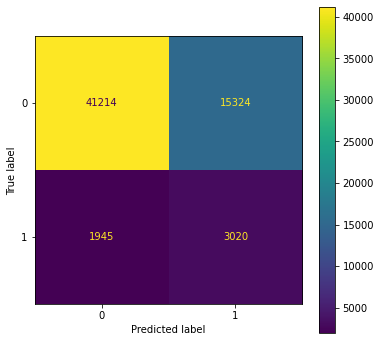

In [ ]:
plot_confusion_matrix(model_xgb,X_test,y_test)

Text(0.5, 0, 'False Positive Rate')

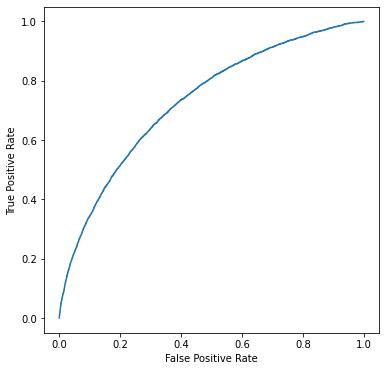

In [ ]:
#ROC curve
ypred_prob=model_xgb.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,ypred_prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
auc=metrics.roc_auc_score(y_test,ypred_prob)
auc

0.7306830932306684

# **SVM**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 44,stratify=y)
X_train.shape, X_test.shape

((246008, 16), (61503, 16))

In [ ]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)
ypred_train_svm=svm.predict(X_train)
ypred_svm=svm.predict(X_test)

In [ ]:
model_diag(ypred_train_svm,ypred_svm,"SVM")

In [ ]:
plot_confusion_matrix(svm,X_test,y_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV
 
# # defining parameter range

# param_grid = {'C': [0.1, 1, 10], 

#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],

#               'kernel': ['rbf']} 
 

# grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
 
# # fitting the model for grid search
# grid.fit(X_train_under, y_train_under)

In [ ]:

# # print best parameter after tuning

# print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning

# print(grid.best_estimator_)

In [ ]:
# grid_predictions = grid.predict(X_test)
 
# # print classification report
# model_diag(grid_predictions,"Grid search CV- SVM")

In [ ]:
plot=pd.melt(summary,id_vars=["Model type"],value_vars=["Test Acc","Senstivity","f1 score"],value_name="metrics")
plot

NameError: ignored

In [ ]:
sns.set_style("darkgrid")
g=sns.catplot(x="Model type",y="metrics",hue="variable",kind="bar",data=plot,height=5,aspect=1.8)
plt.xticks(rotation=90)
ax = g.facet_axis(0, 0)

for p in ax.patches:
    ax.text(p.get_x()+0.02, 
            p.get_height()+0.016, 
           '{0:.5f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='vertical', 
            size='large')

In [ ]:
##Thus,choosing Random forest with Random undersampling as my predictive model.